In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt

1. 데이터 다운로드

In [3]:
origin_data = pd.read_csv("ID-8.txt", sep="\t", header=None)

In [4]:
origin_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1,4,40,1,2,5,1,1,3150,1.0,0,0,2,2,4
1,1,4,56,1,2,5,1,1,3636,1.0,0,0,2,2,4
2,1,2,40,1,1,5,1,3,450,1.0,0,0,2,2,4
3,1,2,41,2,1,5,1,2,420,1.0,0,0,2,2,4
4,1,4,37,1,2,6,1,1,5640,1.0,0,0,1,2,6


In [5]:
origin_data.columns = ['location', 'hosusehold_size', 'age', 'sex','maristat', 'school','school2', 'worktype', 'wage', 'jobtype', 'englishtime','english','union' ,'certi', 'ysrsshl']

In [6]:
origin_data.head()

,location,hosusehold_size,age,sex,maristat,school,school2,worktype,wage,jobtype,englishtime,english,union,certi,ysrsshl
0,1,4,40,1,2,5,1,1,3150,1.0,0,0,2,2,4
1,1,4,56,1,2,5,1,1,3636,1.0,0,0,2,2,4
2,1,2,40,1,1,5,1,3,450,1.0,0,0,2,2,4
3,1,2,41,2,1,5,1,2,420,1.0,0,0,2,2,4
4,1,4,37,1,2,6,1,1,5640,1.0,0,0,1,2,6


2. 전치리 1

In [7]:
origin_data.isna().sum()

location           0
hosusehold_size    0
age                0
sex                0
maristat           0
school             0
school2            0
worktype           0
wage               0
jobtype            1
englishtime        0
english            0
union              0
certi              0
ysrsshl            0
dtype: int64

In [8]:
origin_data.dropna(inplace=True)

In [9]:
origin_data['sex'][origin_data['sex'] == 2] = np.zeros(len(origin_data[origin_data['sex'] == 2]))

C:\Users\Popperkim\AppData\Local\Temp\ipykernel_14932\1580575557.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  origin_data['sex'][origin_data['sex'] == 2] = np.zeros(len(origin_data[origin_data['sex'] == 2]))


In [10]:
origin_data.head()

,location,hosusehold_size,age,sex,maristat,school,school2,worktype,wage,jobtype,englishtime,english,union,certi,ysrsshl
0,1,4,40,1,2,5,1,1,3150,1.0,0,0,2,2,4
1,1,4,56,1,2,5,1,1,3636,1.0,0,0,2,2,4
2,1,2,40,1,1,5,1,3,450,1.0,0,0,2,2,4
3,1,2,41,0,1,5,1,2,420,1.0,0,0,2,2,4
4,1,4,37,1,2,6,1,1,5640,1.0,0,0,1,2,6


In [11]:
origin_data.columns

Index(['location', 'hosusehold_size', 'age', 'sex', 'maristat', 'school',
       'school2', 'worktype', 'wage', 'jobtype', 'englishtime', 'english',
       'union', 'certi', 'ysrsshl'],
      dtype='object')

In [12]:
origin_data.describe()

,location,hosusehold_size,age,sex,maristat,school,school2,worktype,wage,jobtype,englishtime,english,union,certi,ysrsshl
count,1366.0,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000
mean,1.0,3.368228,42.863836,0.610542,1.955344,5.615666,1.289898,2.361640,10469.993411,1.507321,0.507321,1464.311127,2.538799,1.979502,5.387994
std,0.0,1.171637,11.978817,0.487806,0.830850,1.396811,0.898187,1.699677,89213.745633,0.899095,5.488678,38249.872709,1.059215,0.141747,2.280730
min,1.0,1.000000,17.000000,0.000000,1.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,1.0,3.000000,33.000000,0.000000,2.000000,5.000000,1.000000,1.000000,1101.000000,1.000000,0.000000,0.000000,2.000000,2.000000,4.000000
50%,1.0,4.000000,42.000000,1.000000,2.000000,5.000000,1.000000,1.000000,1827.000000,1.000000,0.000000,0.000000,2.000000,2.000000,4.000000
75%,1.0,4.000000,52.000000,1.000000,2.000000,7.000000,1.000000,4.000000,3120.000000,2.000000,0.000000,0.000000,4.000000,2.000000,8.000000
max,1.0,7.000000,82.000000,1.000000,5.000000,9.000000,6.000000,6.000000,999999.000000,4.000000,99.000000,999999.000000,4.000000,2.000000,10.000000


In [13]:
origin_data['marrige_exper'] = np.zeros(len(origin_data.index))

In [14]:
for i in range(len(origin_data.index)) :
    if origin_data['maristat'].iloc[i] == 1 :
        origin_data['marrige_exper'].iloc[i] = 0
    else : 
        origin_data['marrige_exper'].iloc[i] = 1

c:\Users\Popperkim\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [17]:
origin_data['upper_4yrs_univ'] = np.zeros(len(origin_data.index))

In [20]:
for i in range(len(origin_data.index)) :
    if origin_data['school'].iloc[i] == 7 or origin_data['school'].iloc[i] == 8 or origin_data['school'].iloc[i] == 9 :
        origin_data['upper_4yrs_univ'].iloc[i] = 1
    else : origin_data['upper_4yrs_univ'].iloc[i] = 0

c:\Users\Popperkim\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [18]:
origin_data['school'] = origin_data['school'].apply(int)

In [47]:
origin_data['marrige_good'] = np.zeros(len(origin_data.index))
origin_data['marrige_bad'] = np.zeros(len(origin_data.index))

In [48]:
for i in range(len(origin_data.index)) :
    if origin_data['maristat'].iloc[i] == 1 :
        origin_data['marrige_good'].iloc[i] = 0
        origin_data['marrige_bad'].iloc[i] = 0
    elif origin_data['maristat'].iloc[i] == 2 or origin_data['maristat'].iloc[i] == 5 : 
        origin_data['marrige_good'].iloc[i] = 1
        origin_data['marrige_bad'].iloc[i] = 0
    else :
        origin_data['marrige_good'].iloc[i] = 0
        origin_data['marrige_bad'].iloc[i] = 1

c:\Users\Popperkim\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


3. 데이터 분포 확인

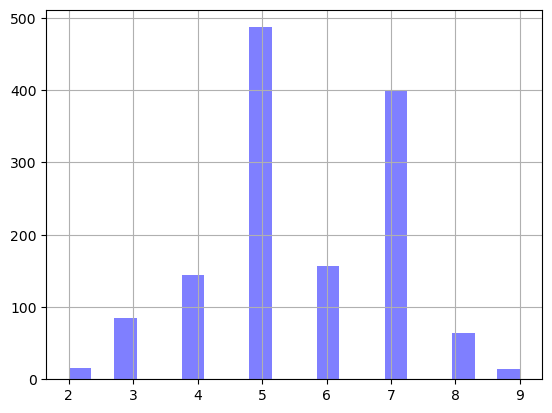

In [40]:
origin_data['school'].hist(histtype = 'bar', bins = 20, color = 'blue', alpha = 0.5)
plt.show()

In [42]:
origin_data.groupby(['sex']).describe()['wage']

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
0,532.0,7273.372180,74839.693508,0.0,837.5,1320.0,2106.0,999999.0
1,834.0,12509.085132,97268.437362,0.0,1440.0,2400.0,3720.0,999999.0


In [43]:
origin_data.groupby(['sex', 'marrige_exper']).describe()['wage']

count          mean            std    min     25%     50%  \
sex marrige_exper                                                              
0   0.0            147.0   1618.829932     972.233098    0.0   960.0  1560.0   
    1.0            385.0   9432.379221   87908.088076    0.0   780.0  1200.0   
1   0.0            173.0  13511.086705  107003.506264  100.0  1050.0  1824.0   
    1.0            661.0  12246.836611   94640.954886    0.0  1560.0  2500.0   

                      75%       max  
sex marrige_exper                    
0   0.0            2050.0    5600.0  
    1.0            2220.0  999999.0  
1   0.0            2524.0  999999.0  
    1.0            4080.0  999999.0

In [45]:
origin_data.groupby(['sex', 'maristat']).describe()['age']

count       mean        std   min    25%   50%    75%   max
sex maristat                                                             
0   1         147.0  28.530612   6.248623  17.0  25.00  27.0  31.00  53.0
    2         316.0  43.759494   9.707422  25.0  36.00  44.0  50.00  73.0
    3          12.0  46.916667  11.220584  30.0  42.75  43.5  52.50  71.0
    4          21.0  49.571429   7.781847  36.0  43.00  50.0  53.00  69.0
    5          36.0  58.944444   8.362995  41.0  52.00  58.5  66.00  75.0
1   1         173.0  31.601156   6.617225  19.0  27.00  30.0  35.00  55.0
    2         611.0  47.103110  10.374820  27.0  39.00  47.0  54.00  82.0
    3          10.0  53.600000   7.167829  47.0  49.00  51.0  58.75  68.0
    4          33.0  47.515152   7.806733  30.0  43.00  50.0  53.00  62.0
    5           7.0  64.714286  11.528433  41.0  63.50  67.0  70.50  77.0

In [21]:
origin_data.describe()

,location,hosusehold_size,age,sex,maristat,school,school2,worktype,wage,jobtype,englishtime,english,union,certi,ysrsshl,marrige_exper,upper_4yrs_univ
count,1366.0,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000
mean,1.0,3.368228,42.863836,0.610542,1.955344,5.615666,1.289898,2.361640,10469.993411,1.507321,0.507321,1464.311127,2.538799,1.979502,5.387994,0.765739,0.349195
std,0.0,1.171637,11.978817,0.487806,0.830850,1.396811,0.898187,1.699677,89213.745633,0.899095,5.488678,38249.872709,1.059215,0.141747,2.280730,0.423691,0.476890
min,1.0,1.000000,17.000000,0.000000,1.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.0,3.000000,33.000000,0.000000,2.000000,5.000000,1.000000,1.000000,1101.000000,1.000000,0.000000,0.000000,2.000000,2.000000,4.000000,1.000000,0.000000
50%,1.0,4.000000,42.000000,1.000000,2.000000,5.000000,1.000000,1.000000,1827.000000,1.000000,0.000000,0.000000,2.000000,2.000000,4.000000,1.000000,0.000000
75%,1.0,4.000000,52.000000,1.000000,2.000000,7.000000,1.000000,4.000000,3120.000000,2.000000,0.000000,0.000000,4.000000,2.000000,8.000000,1.000000,1.000000
max,1.0,7.000000,82.000000,1.000000,5.000000,9.000000,6.000000,6.000000,999999.000000,4.000000,99.000000,999999.000000,4.000000,2.000000,10.000000,1.000000,1.000000


In [29]:
modeling = origin_data[['age', 'sex', 'upper_4yrs_univ', 'wage', 'worktype', 'ysrsshl', 'marrige_exper']][origin_data['age']>30]

In [31]:
modeling.describe()

,age,sex,upper_4yrs_univ,wage,worktype,ysrsshl,marrige_exper
count,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000
mean,46.254417,0.649293,0.325972,12277.562721,2.403710,5.196113,0.889576
std,10.232778,0.477402,0.468944,97910.521073,1.642846,2.320566,0.313556
min,31.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,37.000000,0.000000,0.000000,1152.000000,1.000000,4.000000,1.000000
50%,46.000000,1.000000,0.000000,1966.500000,1.000000,4.000000,1.000000
75%,53.000000,1.000000,1.000000,3485.000000,4.000000,8.000000,1.000000
max,82.000000,1.000000,1.000000,999999.000000,6.000000,10.000000,1.000000


In [23]:
reg1 = smf.logit("marrige_exper ~ wage + sex*upper_4yrs_univ", data = modeling).fit()
print(reg1.summary())

Optimization terminated successfully.
         Current function value: 0.530713
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:          marrige_exper   No. Observations:                 1366
Model:                          Logit   Df Residuals:                     1361
Method:                           MLE   Df Model:                            4
Date:                Sun, 04 Jun 2023   Pseudo R-squ.:                 0.02509
Time:                        11:45:47   Log-Likelihood:                -724.95
converged:                       True   LL-Null:                       -743.61
Covariance Type:            nonrobust   LLR p-value:                 1.548e-07
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.3065      0.125     10.420      0.000       1.061       1.552
wa

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Select the relevant features and target variable
features = ['age', 'sex', 'upper_4yrs_univ', 'wage', 'worktype', 'ysrsshl']
target = 'marrige_exper'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(modeling[features], modeling[target], test_size=0.2, random_state=42)

# Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
rf_predictions = random_forest.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy}")

# SVM
svm = SVC()
svm.fit(X_train, y_train)
svm_predictions = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f"SVM Accuracy: {svm_accuracy}")

# Logistic Regression
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
logreg_predictions = logistic_regression.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_predictions)
print(f"Logistic Regression Accuracy: {logreg_accuracy}")


naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
predictions = naive_bayes.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Naive Bayes Accuracy: {accuracy}")

Random Forest Accuracy: 0.8722627737226277
SVM Accuracy: 0.7518248175182481
Logistic Regression Accuracy: 0.7518248175182481
Naive Bayes Accuracy: 0.864963503649635


In [28]:
print(random_forest.fit(X_train, y_train).feature_importances_)
print(logistic_regression.fit(X_train, y_train).coef_)

[0.55884406 0.02888511 0.01350287 0.25666591 0.04643175 0.0956703 ]
[[ 3.61253733e-02  4.48009691e-04  1.65037918e-04 -2.18767153e-07
   1.62605613e-03  3.06514962e-03]]
